# 🚙**Project: Machine Learning Model for Auto Insurance Pricing**🚙
---
## **Instructor:**  
- **Harpreet Virk**

## **Contributors:**  
- **Lu Dang Duy Khanh**
- **Truc Anh Nguyen**
- **Bassey Elliot**
- **Papa Kofi Arhin**

## **College & Course:**  
**St. Clair College / DAB422-26W-002 CAPSTONE PROJECT 2 Winter 2026 - 002**

---

# <center> **Introduction**  

This project focuses on developing machine learning models to `predict motor insurance premiums` using policyholder, vehicle, claims, and policy data. By leveraging AI, the model captures complex, nonlinear patterns beyond traditional methods, enabling accurate premium forecasts and data-driven recommendations for pricing adjustments and risk mitigation.

## Part 1: Data Preprocessing & Cleaning

#### Import libraries

In [338]:
# Import the essential libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Data Pre-processing 

In [339]:
# Read CSV without initial date parsing
df = pd.read_csv('Motor vehicle insurance data.csv',delimiter=';')

df.head()

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,...,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1,05/11/2015,05/11/2015,05/11/2016,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
1,1,05/11/2015,05/11/2016,05/11/2017,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
2,1,05/11/2015,05/11/2017,05/11/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
3,1,05/11/2015,05/11/2018,05/11/2019,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
4,2,26/09/2017,26/09/2017,26/09/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190


Transform date time columns into time series format

In [340]:
# List of date columns to enforce conversion with errors='coerce'
date_columns = list(df.columns[1:6]) + ['Date_lapse'] 

# Apply pd.to_datetime with errors='coerce' to each date column
for column in df.columns:
    if column in date_columns:
        df[column] = pd.to_datetime(df[column], errors='coerce', format="%d/%m/%Y")

Transform categorical values back to the right data type

In [341]:
# Select categorical columns
cat_cols = ['Distribution_channel', 'Payment', 'Type_risk', 'Area', 'Second_driver', 'N_doors', 'Type_fuel']

for col in cat_cols:
    df[col] = df[col].astype('object')

We keep only the latest record of each ID because it contains all historical static customer data while reflecting their most current policy status and renewal timeline.

In [342]:
df = df.loc[df.groupby('ID')['Date_last_renewal'].idxmax()].reset_index(drop=True)
df.head()

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,...,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1,2015-11-05,2018-11-05,2019-11-05,1956-04-15,1976-03-20,0,4,2,2,...,0,0,2004,80,599,7068.00,0,P,NaN,190
1,2,2017-09-26,2018-09-26,2019-09-26,1956-04-15,1976-03-20,0,4,2,2,...,0,0,2004,80,599,7068.00,0,P,NaN,190
2,3,2013-11-29,2018-11-29,2019-11-29,1975-03-18,1995-07-10,0,15,1,2,...,0,0,2013,85,1229,16030.00,5,P,3.999,1105
3,4,2016-10-21,2018-10-21,2019-10-21,1973-07-10,1993-07-05,0,3,2,2,...,0,0,1986,6,74,1261.82,0,P,NaN,87
4,5,2017-05-12,2018-05-12,2019-05-12,1973-07-10,1993-07-05,0,3,2,2,...,0,0,1986,6,244,3000.00,0,P,NaN,92


#### Data Cleaning 

Check Duplicate

In [343]:
#Check for any duplicate values in the Dataframe df
df.duplicated().any()

False

Checking missing values and cardinality of each feature

In [344]:
def sniff_modified(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        info['data type'] = info['data type'].astype(str)   # ← convert to string
        return info.sort_values('data type')
    
sniffed_df = sniff_modified(df)
#Display
sniffed_df

,data type,percent missing,No. unique,unique values
Date_start_contract,datetime64[ns],0.000000,5518,"[2015-11-05 00:00:00, 2017-09-26 00:00:00, 201..."
Date_last_renewal,datetime64[ns],0.000000,1117,"[2018-11-05 00:00:00, 2018-09-26 00:00:00, 201..."
Date_next_renewal,datetime64[ns],0.000000,1117,"[2019-11-05 00:00:00, 2019-09-26 00:00:00, 201..."
Date_birth,datetime64[ns],0.000000,17048,"[1956-04-15 00:00:00, 1975-03-18 00:00:00, 197..."
Date_driving_licence,datetime64[ns],0.000000,14016,"[1976-03-20 00:00:00, 1995-07-10 00:00:00, 199..."
Date_lapse,datetime64[ns],62.257486,1215,"[NaT, 2017-02-11 00:00:00, 2017-10-24 00:00:00..."
Premium,float64,0.000000,29502,"[216.99, 215.83, 395.47, 118.77, 81.05, 259.32..."
Value_vehicle,float64,0.000000,9313,"[7068.0, 16030.0, 1261.82, 3000.0, 9927.0, 165..."
R_Claims_history,float64,0.000000,455,"[0.0, 0.16, 2.0, 0.34, 0.5, 4.0, 0.2, 0.75, 0...."
Length,float64,9.610856,1130,"[nan, 3.999, 4.25, 4.245, 4.547, 4.129, 4.59, ..."


In [345]:
# Display missing columns only
sniffed_df[sniffed_df['percent missing'] > 0]

,data type,percent missing,No. unique,unique values
Date_lapse,datetime64[ns],62.257486,1215,"[NaT, 2017-02-11 00:00:00, 2017-10-24 00:00:00..."
Length,float64,9.610856,1130,"[nan, 3.999, 4.25, 4.245, 4.547, 4.129, 4.59, ..."
Type_fuel,object,1.601809,3,"[P, D, nan]"


- These missing values represent genuine data gaps (e.g., lapsed policies with no date, unknown vehicle fuel types, or unmeasured vehicle lengths) that cannot be reasonably imputed during **exploratory analysis** without introducing bias.

- We preserve them in their original form for now and will address them during modeling with appropriate ML-based imputation techniques.

Cleaning Distribution_channel

In [346]:
df['Distribution_channel'].value_counts()

Distribution_channel
1             15786
0             15177
0             11290
1              9630
00/01/1900     1619
Name: count, dtype: int64

In [347]:
# wrong display: 00/01/1900 because the number 0 was entered while the column was formatted as a date. The original input was 0
df['Distribution_channel'] = df['Distribution_channel'].replace('00/01/1900','0')

# This is a categorical feature, kept as integer type for ML processing (no later re-labeling needed).
df['Distribution_channel'] = df['Distribution_channel'].astype('int64')

## **Part 2: Exploratory Data Analysis**

In [348]:
df.iloc[:,:15].describe()

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Date_lapse,Premium
count,53502.000000,53502,53502,53502,53502,53502,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,20193,53502.000000
mean,26751.500000,2015-03-03 04:28:20.482224896,2017-12-29 11:18:08.841538816,2018-12-29 12:22:13.901536256,1970-10-02 06:37:52.961758436,1993-05-31 19:13:48.843781504,0.475048,5.793241,1.513738,1.859818,1.061829,0.384004,2017-06-07 11:46:12.069529088,320.046055
min,1.000000,1980-10-25 00:00:00,2015-11-02 00:00:00,2016-11-02 00:00:00,1918-04-05 00:00:00,1942-10-01 00:00:00,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2015-11-02 00:00:00,40.180000
25%,13376.250000,2014-02-24 00:00:00,2017-09-10 00:00:00,2018-09-10 00:00:00,1961-07-04 06:00:00,1984-02-18 12:00:00,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2016-09-26 00:00:00,242.810000
50%,26751.500000,2016-03-30 00:00:00,2018-04-03 00:00:00,2019-04-03 00:00:00,1971-03-03 12:00:00,1994-06-08 00:00:00,0.000000,4.000000,1.000000,2.000000,1.000000,0.000000,2017-05-31 00:00:00,295.710000
75%,40126.750000,2017-10-27 00:00:00,2018-07-31 00:00:00,2019-07-31 00:00:00,1980-09-16 00:00:00,2003-11-01 00:00:00,1.000000,7.000000,2.000000,2.000000,1.000000,1.000000,2018-03-04 00:00:00,367.400000
max,53502.000000,2018-11-30 00:00:00,2018-11-30 00:00:00,2019-11-30 00:00:00,2000-10-11 00:00:00,2018-11-26 00:00:00,1.000000,40.000000,17.000000,17.000000,4.000000,7.000000,2019-06-01 00:00:00,2596.770000
std,15444.841388,NaN,NaN,NaN,NaN,NaN,0.499382,5.907575,1.028404,1.219186,0.259669,0.556009,NaN,144.101841


In [349]:
df.iloc[:,15:].describe()

,Cost_claims_year,N_claims_year,N_claims_history,R_Claims_history,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,Length,Weight
count,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,48360.000000,53502.000000
mean,117.245403,0.208721,2.608706,0.466334,2004.764495,93.302718,1618.951478,18557.606503,4.257348,1190.749542
std,1477.775304,0.779043,3.828327,0.821347,6.801399,37.268660,597.007180,9237.447966,0.393545,444.623471
min,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,49.000000,270.460000,1.978000,43.000000
25%,0.000000,0.000000,0.000000,0.000000,2001.000000,75.000000,1390.000000,13200.000000,4.013000,1049.000000
50%,0.000000,0.000000,1.000000,0.000000,2005.000000,90.000000,1598.000000,17770.000000,4.239000,1211.000000
75%,0.000000,0.000000,4.000000,0.670000,2008.000000,110.000000,1910.000000,22780.000000,4.456000,1389.000000
max,236285.180000,18.000000,52.000000,26.070000,2018.000000,580.000000,7480.000000,220675.800000,8.218000,7300.000000


### Univariate Analysis 

In [350]:
# Select numeric columns
numeric_cols = df.drop(['ID'] + cat_cols ,axis=1).select_dtypes(include=['int64', 'float64']).columns

#### Histogram Disbribution of Numerical Values

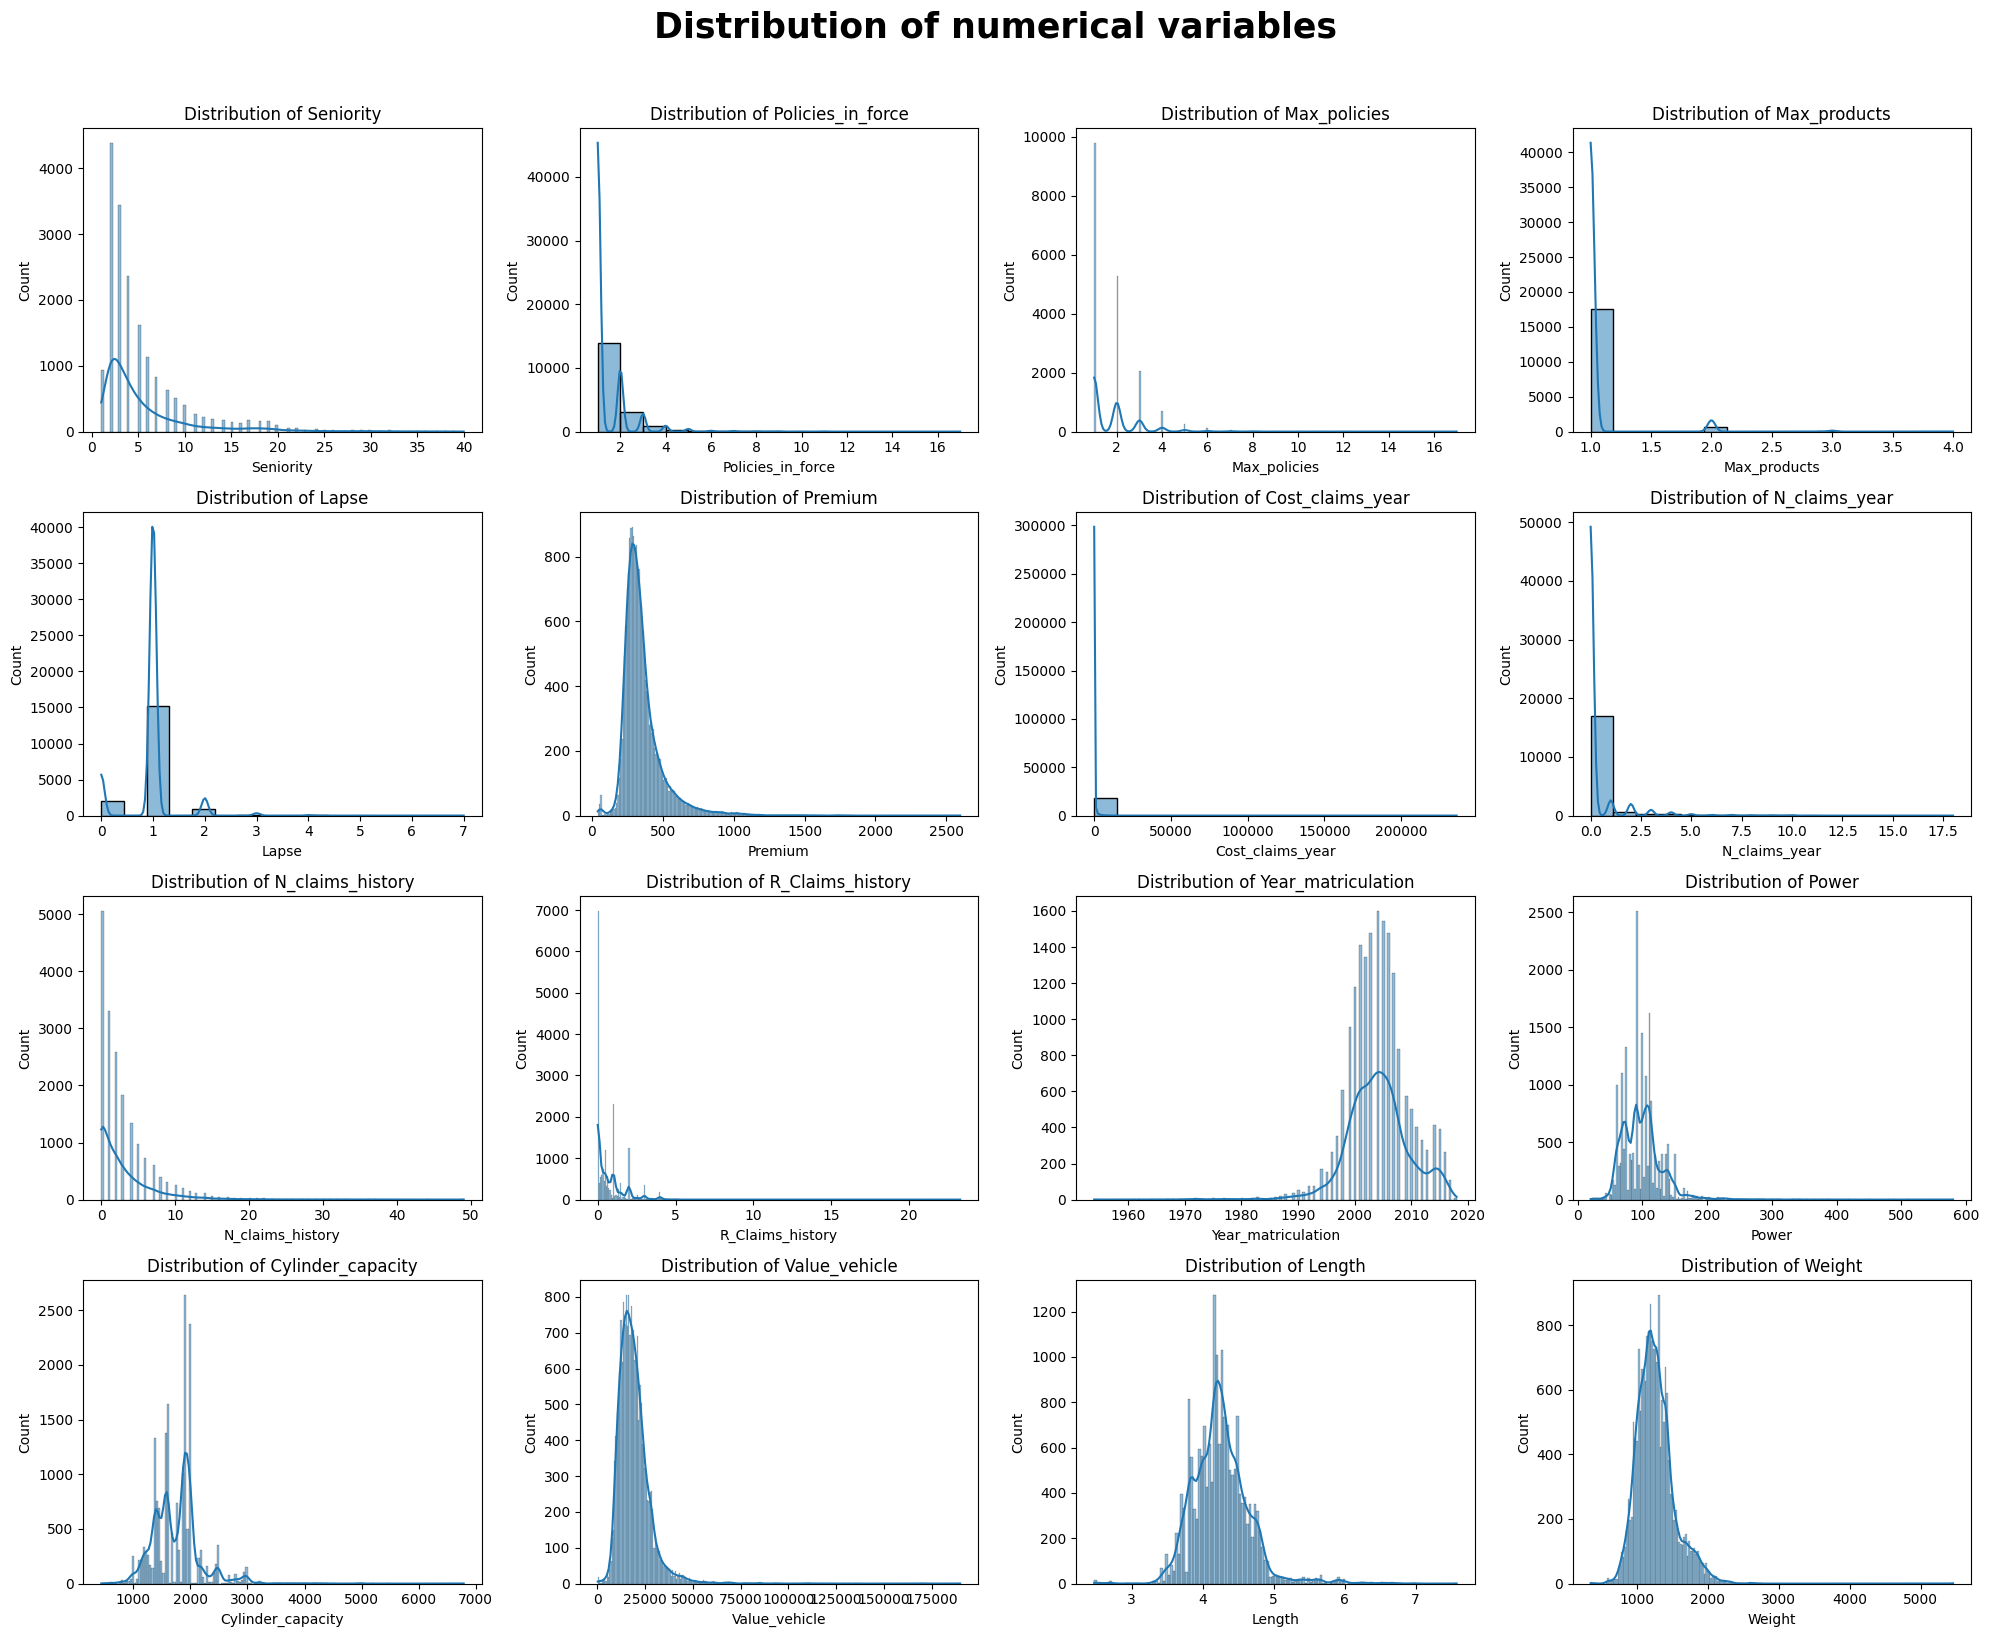

In [351]:
n_cols = 4
n_vars = len(numeric_cols)
n_rows = (n_vars + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df.dropna(), x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

# Hide unused subplots
for j in range(n_vars, len(axes)):
    axes[j].set_visible(False)

fig.suptitle("Distribution of numerical variables", size=25,fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

#### Distribution of categorical values

In [352]:
# n_cols = 4 
# n_rows = (len(cat_cols) + n_cols - 1) // n_cols 

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
# axes = axes.flatten()  

# for i, col in enumerate(cat_cols):
#     sns.countplot(data=df, x=col, ax=axes[i])
#     axes[i].set_title(f'Counts of {col}')
    
#     # Add count labels on bars
#     for container in axes[i].containers:
#         axes[i].bar_label(container)
    
#     # Increase y-limit by 20%
#     current_ylim = axes[i].get_ylim()
#     axes[i].set_ylim([0, current_ylim[1] * 1.2])

# # Hide unused subplots
# for j in range(len(cat_cols), len(axes)):
#     axes[j].set_visible(False)

# fig.suptitle("Distribution of categorical variables", size=25,fontweight='bold', y=1.02)

# plt.tight_layout()
# plt.show()

### Multivariate Analysis

#### Correlation Matrix

In [353]:
# # Compute correlation matrix
# corr_matrix = df[numeric_cols].corr()

# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# # Plot heatmap with upper triangle only
# plt.figure(figsize=(15,10))
# sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
# plt.title('Correlation Matrix')
# plt.show()

## **Part 3: Build predictive models**

---

### **Missing Data imputation**

In part 1, we acknowledged that `Type_fuel, and Length` have missing values. We will therefore begin by cleaning these values.

**Type_fuel**

 Vehicles with similar risk profiles and physical characteristics (door count) are likely to have similar engine/fuel type configurations. This approach preserves logical consistency while using the most frequent value from comparable vehicles.

In [354]:
df['Type_fuel'] = df.groupby(['Type_risk','N_doors'])['Type_fuel'].transform(lambda x: x.fillna(x.mode()[0]))

In [355]:
# Recheck
df['Type_fuel'].isna().sum()

0

**Length**

Vehicles from the same geographical area with the same door count tend to have similar size profiles. Using the median within these logical groupings provides a robust estimate that is less affected by outliers than the mean.

In [356]:
df['Length'] = df.groupby(['Area','N_doors'])['Length'].transform(lambda x: x.fillna(x.median()))

In [357]:
# Recheck
df['Length'].isna().sum()

0

Date_lapse completely remove

In [358]:
df = df.drop('Date_lapse',axis=1)

### **Denoising outliers**

In [359]:
# Get only numeric columns
noised_cols = ['Premium']

# Remove outliers for each numeric column (keep values between 1th and 99th percentile)
for col in noised_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print(f"Original shape: {df.shape}")
print(f"Clean shape: {df.shape}")

Original shape: (52430, 29)
Clean shape: (52430, 29)


In [360]:
df['Premium'].describe()

count    52430.000000
mean       315.404682
std        120.739253
min         65.010000
25%        244.010000
50%        295.710000
75%        365.367500
max        839.440000
Name: Premium, dtype: float64

### **Feature Engineering**

In [361]:
# Create Driver_Age first (This fixes your KeyError)
df['Driver_Age'] = (df['Date_last_renewal'] - df['Date_birth']).dt.days // 365

# Vehicle Features
# Vehicle age (Current year - Registration year)
df['Vehicle_Age'] = df['Date_last_renewal'].dt.year - df['Year_matriculation']

# Driving Experience (Years since getting license)
df['Driving_Experience'] = df['Date_last_renewal'].dt.year - df['Date_driving_licence'].dt.year

# "Insurance premiums are highly persistent. A customer who was in the 'High Risk' bracket last year is statistically likely to remain there this year. We created a 3-level tier (Low, Mid, High) based on the customer's previous policy standing
#df['Historical_Policy_Tier'] = pd.qcut(df['Premium'], 3, labels=False)

# Customer Seniority (Years with the company)
df['Customer_Years'] = df['Date_last_renewal'].dt.year - df['Date_start_contract'].dt.year

# Interaction & Ratio Features 
# Power-to-Weight Ratio (High ratio = High Risk/Performance)
df['Power_Weight_Ratio'] = df['Power'] / df['Weight']

# Value per Age (Risk factor for younger drivers in expensive cars)
df['Value_per_Age'] = df['Value_vehicle'] / (df['Driver_Age'] + 1)

### DateTime Feature Engineering

In [362]:
date_columns.remove('Date_lapse')

def add_date_features(df, date_column):
    """Add datetime features for a specific column"""
    df[f'{date_column}_year'] = df[date_column].dt.year
    df[f'{date_column}_month'] = df[date_column].dt.month
    df[f'{date_column}_day'] = df[date_column].dt.day

    # Remove original date column
    df = df.drop(date_column, axis=1)
    return df

# Apply to df
for date_column in date_columns:
    df = add_date_features(df, date_column)

#Recheck
df.iloc[:,30:].head()

,Date_start_contract_year,Date_start_contract_month,Date_start_contract_day,Date_last_renewal_year,Date_last_renewal_month,Date_last_renewal_day,Date_next_renewal_year,Date_next_renewal_month,Date_next_renewal_day,Date_birth_year,Date_birth_month,Date_birth_day,Date_driving_licence_year,Date_driving_licence_month,Date_driving_licence_day
0,2015,11,5,2018,11,5,2019,11,5,1956,4,15,1976,3,20
1,2017,9,26,2018,9,26,2019,9,26,1956,4,15,1976,3,20
2,2013,11,29,2018,11,29,2019,11,29,1975,3,18,1995,7,10
3,2016,10,21,2018,10,21,2019,10,21,1973,7,10,1993,7,5
4,2017,5,12,2018,5,12,2019,5,12,1973,7,10,1993,7,5


### Encoding Categorical Columns

In [363]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [364]:
cat = sniff_modified(df)
cat[cat['data type'] == 'object']

,data type,percent missing,No. unique,unique values
Second_driver,object,0.0,2,"[0, 1]"
Payment,object,0.0,2,"[0, 1]"
N_doors,object,0.0,6,"[0, 5, 4, 3, 2, 6]"
Type_fuel,object,0.0,2,"[P, D]"
Area,object,0.0,2,"[0, 1]"
Type_risk,object,0.0,4,"[1, 3, 2, 4]"


In [365]:
binary_cols = ['Payment', 'Area', 'Second_driver','Type_fuel'] #BinaryEncoder
risk_cols = ['Type_risk'] # OneHot                                   
doors_cols  = ['N_doors'] # Ordinal Encoder

In [366]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

preprocessor = ColumnTransformer([
    # We remove handle_unknown='ignore' here because for binary columns, 
    ("binary", OneHotEncoder(drop='if_binary', sparse_output=False), binary_cols),
    
    # OneHot for multi-category columns
    ("risk", OneHotEncoder(handle_unknown='ignore', sparse_output=False), risk_cols),
    
    # Ordinal Encoder (Consider adding categories manually to ensure correct order)
    ("ord_doors", OrdinalEncoder(), doors_cols)
], remainder='passthrough')

In [367]:
preprocessor.set_output(transform="pandas")
df_final = preprocessor.fit_transform(df)   

In [368]:
df_final.rename(columns=lambda c: c.replace('remainder__', ''), inplace=True)
df_final.head()

,binary__Payment_1,binary__Area_1,binary__Second_driver_1,binary__Type_fuel_P,risk__Type_risk_1,risk__Type_risk_2,risk__Type_risk_3,risk__Type_risk_4,ord_doors__N_doors,ID,...,Date_last_renewal_day,Date_next_renewal_year,Date_next_renewal_month,Date_next_renewal_day,Date_birth_year,Date_birth_month,Date_birth_day,Date_driving_licence_year,Date_driving_licence_month,Date_driving_licence_day
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,...,5,2019,11,5,1956,4,15,1976,3,20
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2,...,26,2019,9,26,1956,4,15,1976,3,20
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,3,...,29,2019,11,29,1975,3,18,1995,7,10
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4,...,21,2019,10,21,1973,7,10,1993,7,5
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5,...,12,2019,5,12,1973,7,10,1993,7,5


--- 

## Select models

In [369]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

In [370]:
X = df_final.drop(['Premium','ID'],axis=1)
y = df_final['Premium']

# Train: 70%, Rest: 30%
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.3, random_state=42)

# Split Rest into Val (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

print(f"70/15/15 Split:")
print(f"Train: {len(X_train)} samples")
print(f"Val: {len(X_val)} samples") 
print(f"Test: {len(X_test)} samples")

70/15/15 Split:
Train: 36701 samples
Val: 7864 samples
Test: 7865 samples


#### Evaluate the baseline model 

In [371]:
# Define SMAPE
def smape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

In [372]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,root_mean_squared_error

# 1. Initialize the model 
xgb_model = XGBRegressor(random_state=42)

# 2. Fit and predict 
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# # 3. Check  score
print(f"XGBoost R^2 Score: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred)}")
print(f"SMAPE: {smape(y_test, y_pred)}")


XGBoost R^2 Score: 0.4653419793052621
MAE: 61.8680155430798
RMSE: 87.87641211388453
SMAPE: 19.006631681723732


#### Variable Importances

In [373]:
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': xgb_model.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)

print("Feature Importances:")
display(feature_importances.head(10))

Feature Importances:


,feature,importance
0,ord_doors__N_doors,0.323283
1,Vehicle_Age,0.064895
2,binary__Payment_1,0.062994
3,risk__Type_risk_4,0.058984
4,binary__Second_driver_1,0.039867
5,Value_vehicle,0.035247
6,Policies_in_force,0.023342
7,Value_per_Age,0.022951
8,Customer_Years,0.022554
9,R_Claims_history,0.022314


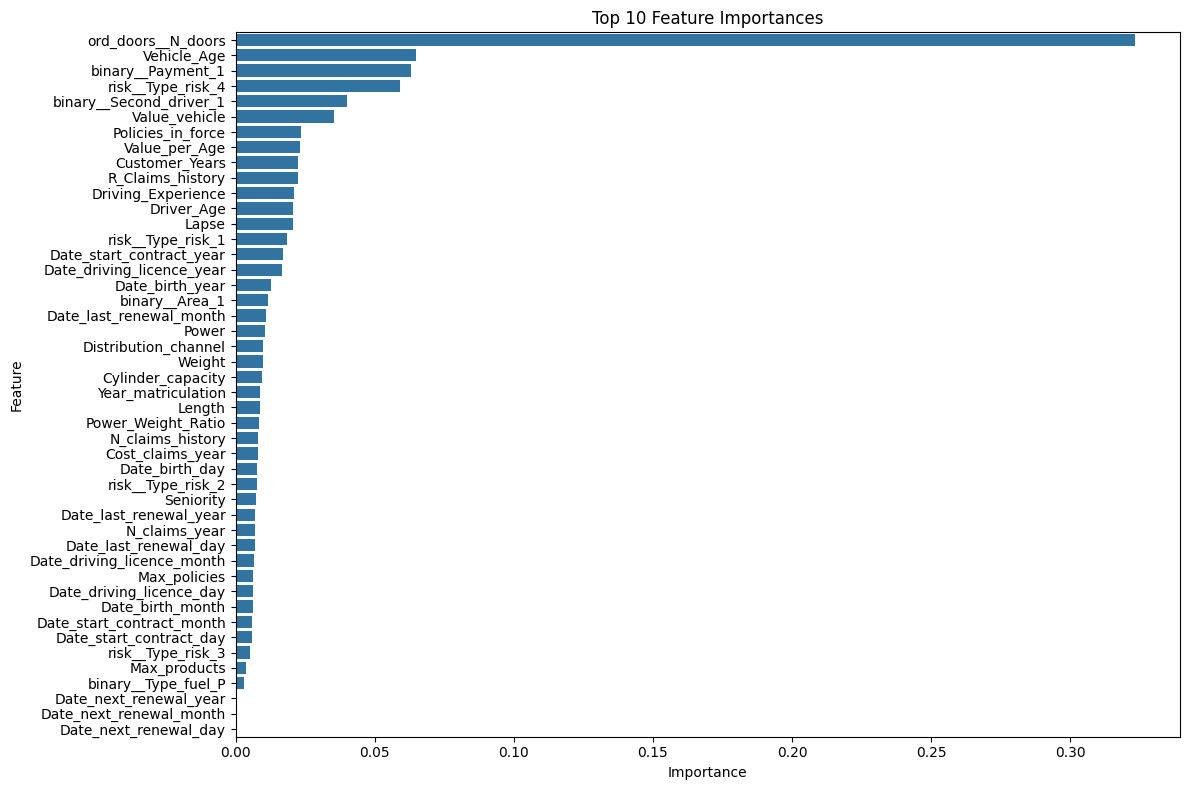

In [374]:
# Display 10 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Scatterplot for Predicted vs Actual

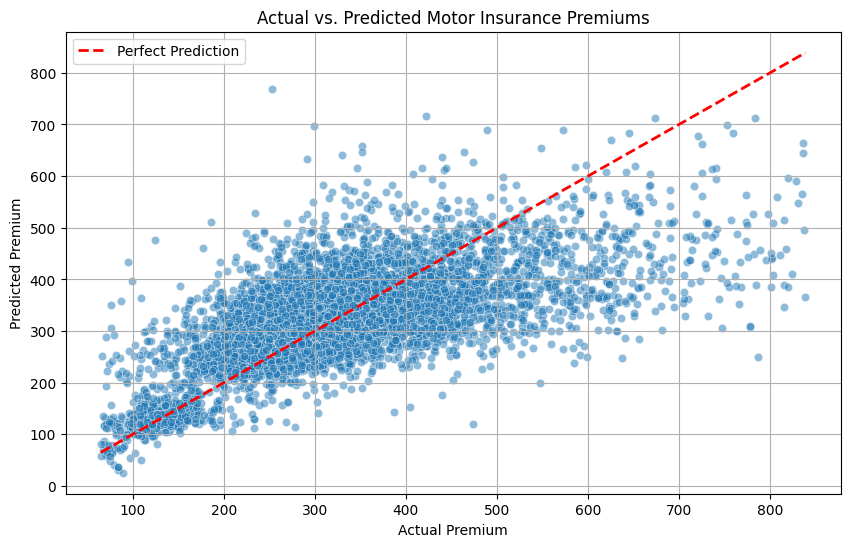

In [376]:
# Assuming y_test contains actual values and y_pred contains model predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

# Add a diagonal line to represent perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', lw=2, label='Perfect Prediction')

plt.title('Actual vs. Predicted Motor Insurance Premiums')
plt.xlabel('Actual Premium')
plt.ylabel('Predicted Premium')
plt.legend()
plt.grid(True)
plt.show()

Hyperparameter tuning

In [375]:
# from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBRegressor

# # 1. Define the aggressive search space
# param_grid = {
#     'n_estimators': [500, 1000, 2000],          # High number of trees (use early stopping)
#     'max_depth': [3, 5, 7, 9, 12],              # Allow for deep trees to catch complex risk factors
#     'learning_rate': [0.01, 0.03, 0.05, 0.1],   # Smaller steps for higher precision
#     'subsample': [0.6, 0.7, 0.8, 0.9],          # Prevent overfitting by using 60-90% of data per tree
#     'colsample_bytree': [0.5, 0.7, 0.8, 0.9],   # Feature sampling (prevents one feature from dominating)
#     'gamma': [0, 0.1, 0.2, 0.5, 1, 5],          # Minimum loss reduction to split (Regularization)
#     'min_child_weight': [1, 3, 5, 10],          # Stop trees if they get too specific to 1-2 people
#     'reg_alpha': [0, 0.01, 0.1, 1],             # L1 regularization
#     'reg_lambda': [1, 2, 5, 10]                 # L2 regularization
# }

# # 2. Initialize the model
# xgb = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# # 3. Setup the search (n_iter=50 is aggressive but efficient)
# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_grid,
#     n_iter=50, 
#     scoring='neg_mean_absolute_error', # Optimize to lower your $61 error directly
#     cv=5, 
#     verbose=2, 
#     random_state=42,
#     n_jobs=-1
# )

# # 4. Fit the search
# print("Starting aggressive tuning... this may take a few minutes.")
# random_search.fit(X_train, y_train)

# # 5. Get the best model
# best_xgb = random_search.best_estimator_

# print("\nBest Parameters Found:")
# print(random_search.best_params_)